In [ ]:
# 1. Deberá usar la base de datos https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download 
# que tambien se encuentra en el drive con el nombre de "breast", estos datos son procedentes de un diagnostico 
# en pacientes con cáncer de mama, donde la columna "diagnosis" indica si el tumor es  Benigno ="B" o maligno="M", 
# por lo tanto deberá seguir las siguientes condiciones:

# - Con esta base de datos deberá aplicar dos métodos de machine learning para una clasificación, deberá indicar cual tiene mejores resultados.

# - Con el mejor método debe realizar una validación cruzada con 10 particiones e indicar cual es el resultado de la media de los accuracy.
# - Realice una matriz de confusión y calcule: Especificidad, Sensibilidad, Accuracy y Precision

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from tqdm import tqdm

In [ ]:
uploaded=files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
data=pd.read_excel(io.BytesIO(uploaded['data.xlsx']))

In [ ]:
data.shape

(569, 32)

In [ ]:
#Cambiando los valores del diagnóstico por 0 y 1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Separando los datos con los cuales trabajar, las medias
dataMedia=data.loc[:,['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]
# podría usar dataMedia=data.iloc[:,2:11]
dataMedia.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
from pandas.api.types import is_numeric_dtype

In [ ]:
# Columnas relacionadas
def colDep(df):
  col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas numéricas
  df = df[col] # Nueva Bd con solo las conlumnas numéricas
  
  #Verificación por medio de los valores
  return df.corr().unstack().sort_values(ascending = False).drop_duplicates() 

colDep(dataMedia)

radius_mean             radius_mean               1.000000
                        perimeter_mean            0.997855
area_mean               radius_mean               0.987357
                        perimeter_mean            0.986507
concave points_mean     concavity_mean            0.921391
concavity_mean          compactness_mean          0.883121
perimeter_mean          concave points_mean       0.850977
compactness_mean        concave points_mean       0.831135
area_mean               concave points_mean       0.823269
concave points_mean     radius_mean               0.822529
perimeter_mean          concavity_mean            0.716136
concavity_mean          area_mean                 0.685983
                        radius_mean               0.676764
smoothness_mean         compactness_mean          0.659123
compactness_mean        symmetry_mean             0.602641
fractal_dimension_mean  smoothness_mean           0.584792
compactness_mean        fractal_dimension_mean    0.5653

In [ ]:
#Datos para la clasificación
from sklearn.model_selection import train_test_split
  ##se entrena con el 70% y se testea con el 30% restante
train, test= train_test_split(data, test_size=0.3) 

In [ ]:
#Columnas de entrenamiento y testeo
# Se usará para el entrenamiento las columnas, con una correlación inferior al 90%:
#  'texture_mean','perimeter_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean'
# Testeo : 'diagnosis'

X_train=train.loc[:,['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']]
Y_train=train.loc[:,'diagnosis'] #Podría usar train.1loc[:,1]
X_test=test.loc[:,['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']]
Y_test=test.loc[:,'diagnosis']

In [ ]:
#Clasificación por árbol de decisión 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Creación del clasificador 
tree=DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=10)

In [ ]:
#Entrenamiento del clasificador
tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=10)

In [ ]:
#Cálculo de la predicción
Y_pred_tree= tree.predict(X_test)

In [ ]:
#Media del score
x = dataMedia  #Datos fuente reales TOTALES, que necesito comparar con la predicción
y = data['diagnosis'] #Datos objetivos TOTALES, que necesito comparar con la predicción

scores = cross_val_score(tree, x , y, cv=10, scoring='accuracy') #10 particiones
print(scores.mean())

0.919235588972431


In [ ]:
#Clasificación por vecinos Knn
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
#Selección del número de vecinos para knn
k_range=range(1,31) #Rango de posibles vecinos
k_scores=[] #aquí se almacena la lista de scores
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy') #10 particiones
  k_scores.append(scores.mean())
kOpt = k_scores.index(max(k_scores)) + 1
print(max(k_scores))
print(kOpt)

0.8946428571428571
21


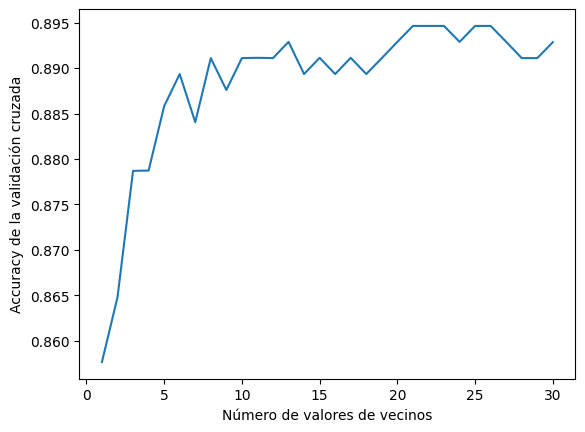

In [ ]:
#Grafico de resultados
plt.plot(k_range, k_scores)
plt.xlabel('Número de valores de vecinos')
plt.ylabel('Accuracy de la validación cruzada')
plt.show()

In [ ]:
#Creación del clasificador 
knn= KNeighborsClassifier(n_neighbors = kOpt)

In [ ]:
#Entrenamiento del clasificador
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
#Creación de la predicción
Y_pred_knn= knn.predict(X_test)

In [ ]:
#Media del score
x = dataMedia  #Datos fuente reales TOTALES, que necesito comparar con la predicción
y = data['diagnosis'] #Datos objetivos TOTALES, que necesito comparar con la predicción

scores = cross_val_score(knn, x , y, cv=10, scoring='accuracy') #10 particiones
print(scores.mean())

0.8946428571428571


[[100   6]
 [ 13  52]]


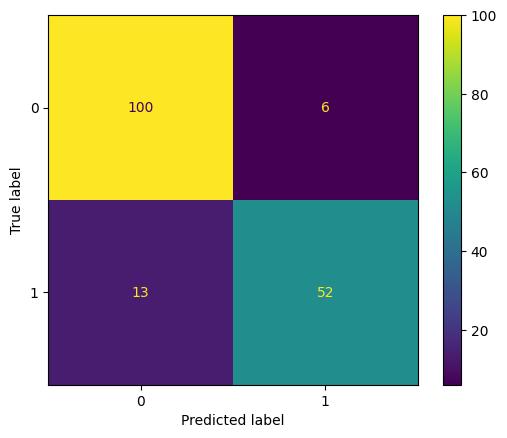

In [ ]:
#Matriz de confusión Arbol
from sklearn import metrics
confusion_matrix_tree= metrics.confusion_matrix(Y_test,Y_pred_tree)
print(confusion_matrix_tree)

cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_tree,display_labels=[0,1])
cm_display.plot()
plt.show()

[[102   4]
 [ 12  53]]


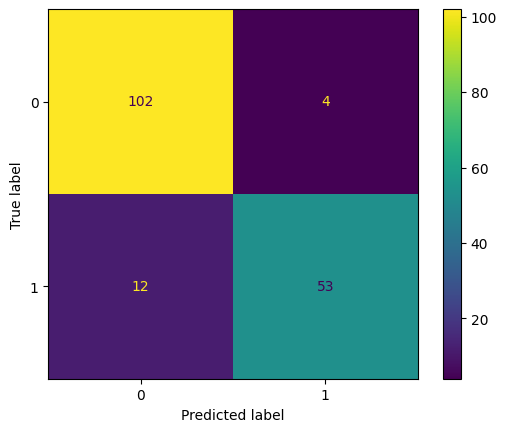

In [ ]:
#Matriz de confusión knn
from sklearn import metrics
confusion_matrix_knn= metrics.confusion_matrix(Y_test,Y_pred_knn)
print(confusion_matrix_knn)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn,display_labels=[0,1])
cm_display.plot()
plt.show()

In [ ]:
#Parámetros Arbol
def mcPar(mc):
  print(f"Sensibilidad= {mc[0,0]/( mc[0,0] + mc[0,1] )}")
  print(f"Especificidad= {mc[1,1]/( mc[1,1] + mc[1,0] )}")
  print(f"Precisión= {mc[0,0]/( mc[0,0] + mc[1,0] )}")
  print(f"Accuracy= {(mc[0,0] + mc[1,1] )/( mc[0,0] + mc[0,1] + mc[1,1] )}")

mcPar(confusion_matrix_tree)

Sensibilidad= 0.9433962264150944
Especificidad= 0.8
Precisión= 0.8849557522123894
Accuracy= 0.9620253164556962


In [ ]:
#Parámetros knn
def mcPar(mc):
  print(f"Sensibilidad= {mc[0,0]/( mc[0,0] + mc[0,1] )}")
  print(f"Especificidad= {mc[1,1]/( mc[1,1] + mc[1,0] )}")
  print(f"Precisión= {mc[0,0]/( mc[0,0] + mc[1,0] )}")
  print(f"Accuracy= {(mc[0,0] + mc[1,1] )/( mc[0,0] + mc[0,1] + mc[1,1] )}")

mcPar(confusion_matrix_knn)

Sensibilidad= 0.9622641509433962
Especificidad= 0.8153846153846154
Precisión= 0.8947368421052632
Accuracy= 0.9748427672955975
